In [1]:
import os
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
df1 = pd.read_csv('sa_play.csv') 
df1 = df1.drop(columns = ['Unnamed: 0', 'Date'])
df2 = pd.read_csv('sa_all(play).csv') 
df2 = df2.drop(columns = ['Unnamed: 0', 'Date'])
df = pd.concat([df1, df2], axis=0, join='outer')
df.head()

,Surgery,ASA,Emergency,Age,Height,BW,BMI,Gender,IBW,BSA,...,In_DBP,In_5_SBP,In_5_DBP,In_10_SBP,In_10_DBP,In_HR,In_5_HR,In_10_HR,In_Sat,SA_Arrthymia
0,OBS,1,No,34,158.0,48.0,19.23,Female,50.60,1.45,...,60,115,70,120,65,80,85,92,98,None
1,OBS,2,No,36,168.0,84.0,29.76,Female,59.70,1.98,...,90,159,82,102,58,85,80,68,97,None
2,GU,3,Yes,91,162.0,61.0,23.24,Male,58.74,1.66,...,83,172,83,160,65,62,60,59,100,None
3,GU,3,No,93,168.0,65.8,23.31,Male,64.20,1.75,...,45,112,50,100,51,68,65,60,97,None
4,Ortho,1,No,20,176.0,88.0,28.41,Male,71.48,2.07,...,60,110,65,110,55,60,45,55,98,None


In [3]:
feature_list = ['Surgery', 'ASA', 'Emergency', 'Age', 'Height', 'BW', 'BMI', 'Gender', 'IBW',
               'BSA', 'LBW', 'HTN', 'DM', 'Arrthymia', 'Pregnancy', 'Ankylosing_Spine',
               'Spine_OP_Hx', 'Anal_OP', 'CSF volume', 'Heavy_Plain', 'LA_dose', 'Fentanyl_dose',
               'Injection_Site', 'Needle_size', 'Needle_Bevel', 'Patient_Postition', 'Experience',
               'SA_Level_1st']

In [4]:
le = LabelEncoder()

In [5]:
X = df[feature_list].drop('SA_Level_1st', axis=1)
X = pd.get_dummies(X)
y = le.fit_transform(df['SA_Level_1st'])

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state= 20220216, stratify=y)

In [7]:
def tree_model(train_X, train_y, test_X, test_y, criterion, max_depth):
    tree = DecisionTreeClassifier(random_state=20220216, criterion=criterion, max_depth=max_depth)
    tree.fit(train_X, train_y)
    train_auc = tree.score(train_X, train_y)
    test_auc = tree.score(test_X, test_y)
    return train_auc, test_auc

In [8]:
def run_tree(train_X, train_y, test_X, test_y):
    result = {"criterion":[],
             "max_depth":[],
             "train_auc":[],
             "test_auc":[]
             }
    for criterion in ["gini", "entropy"]:
        list_train_auc = []
        list_test_auc = []
        for max_depth in range(1, 11):
            train_auc, test_auc = tree_model(train_X, train_y, test_X, test_y, criterion, max_depth)
            list_train_auc.append(train_auc)
            list_test_auc.append(test_auc)
            result['criterion'].append(criterion)
            result['max_depth'].append(max_depth)
            result['train_auc'].append(train_auc)
            result['test_auc'].append(test_auc)
        plt.plot(range(1, 11), list_train_auc, "o-", label="train-auc")
        plt.plot(range(1, 11), list_test_auc, "*-", label="test-auc")
        plt.xlabel("max_depth")
        plt.ylabel("accuracy")
        plt.title("Criterion = " +str(criterion))
        plt.legend(["train-auc", "test-auc"])
        plt.show()
    
    
    return pd.DataFrame(result)

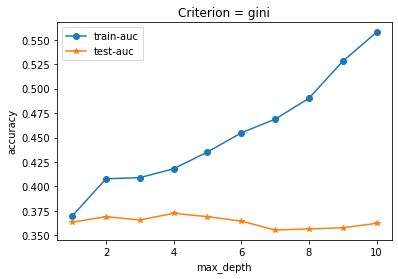

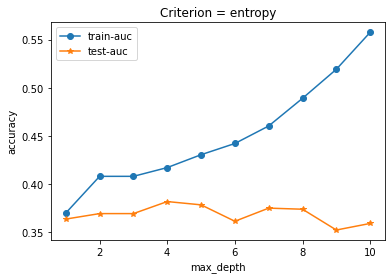

,criterion,max_depth,train_auc,test_auc
0,gini,1,0.369621,0.363326
1,gini,2,0.407808,0.369021
2,gini,3,0.408948,0.365604
3,gini,4,0.418068,0.372437
4,gini,5,0.435167,0.369021
5,gini,6,0.454830,0.364465
6,gini,7,0.468795,0.355353
7,gini,8,0.490168,0.356492
8,gini,9,0.528071,0.357631
9,gini,10,0.557709,0.362187


In [9]:
run_tree(train_X, train_y, test_X, test_y)

In [10]:
tree = DecisionTreeClassifier(random_state=20220216,
                             criterion='entropy',
                             max_depth=4)
tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=20220216)

In [11]:
predict = tree.predict(test_X)

In [12]:
accuracy_score(predict, test_y)

0.3815489749430524

In [13]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.25      0.05      0.08       110
           3       0.00      0.00      0.00        10
           4       0.44      0.59      0.50       295
           5       0.34      0.54      0.42       293
           6       0.00      0.00      0.00       161

    accuracy                           0.38       878
   macro avg       0.15      0.17      0.14       878
weighted avg       0.29      0.38      0.32       878



C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sdfe0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# 繪製混淆矩陣
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    - cm : 計算出的混淆矩陣的值
    - classes : 混淆矩阵中每一列每一行對應的行
    - normalize : True:顯示百分比, False:顯示個數
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("顯示百分比：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
        print(cm)
    else:
        print('顯示具體數字：')
        print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # matplotlib版本問題，如果不加下面這行Code，則繪製的混淆矩陣上下只能顯示一半，有的版本的matplotlib不需要下面的Code，需試一下即可
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

顯示具體數字：
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  1   0   5   2   2   7   3]
 [  0   0   0   0   0   0   0]
 [  4   0  33   4 173 129  52]
 [  3   1  72   4 120 157 106]
 [  0   0   0   0   0   0   0]]


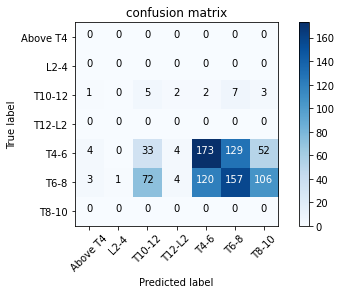

In [15]:
classes = ['Above T4', 'L2-4', 'T10-12', 'T12-L2', 'T4-6', 'T6-8', 'T8-10']
cm = confusion_matrix(predict, test_y)
plot_confusion_matrix(cm, classes=classes, normalize=False, title='confusion matrix')